In [1]:
# data wrangling
import pandas as pd
import numpy as np
%matplotlib inline

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler

# for data preprocessing and clustering
from sklearn.cluster import KMeans

# load the data

In [2]:
data_path = "../data/"

#load data
df = pd.read_csv(data_path+'sub_df.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896877 entries, 0 to 1896876
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 115.8+ MB


In [13]:
transactions = df.copy()

# Clean the dataset

In [14]:
transactions.dropna(inplace = True)

In [15]:
transactions.drop_duplicates(inplace = True)

# some preprocessing and feature engineering

In [16]:
# add a columns with only negative net sales and only positive net sales
transactions['retours'] = transactions['sales_net'].apply(lambda x: (x<=0)*x)
transactions['sales'] = transactions['sales_net'].apply(lambda x: (x>0)*x)

In [17]:
# implement customer clustering with the right dataset
transactions['date_order'] = pd.to_datetime(transactions['date_order'])
transactions['date_invoice'] = pd.to_datetime(transactions['date_invoice'])
transactions["date_order"] = transactions["date_order"].apply(lambda x: x.date())
transactions["date_invoice"] = transactions["date_invoice"].apply(lambda x: x.date())

In [18]:
# create an aggregated dataset with one line for each customer 
customers = transactions.groupby(['client_id']).agg(list)

In [19]:
customers.reset_index(inplace = True)

In [20]:
customers

,client_id,date_order,date_invoice,product_id,sales_net,quantity,order_channel,branch_id,retours,sales
0,14,"[2019-03-21, 2017-11-08, 2017-12-05, 2019-06-1...","[2019-03-21, 2017-11-08, 2017-12-07, 2019-06-1...","[3173964, 2867183, 2896323, 2582447, 3214610, ...","[242.263692, 66.48150000000001, 443.394, 81.17...","[201, 41, 81, 3, 307, 3, 7, 3, 201, 3, 21, 3, ...","[online, by phone, by phone, by phone, online,...","[10319, 10319, 10319, 10319, 10319, 10319, 103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[242.263692, 66.48150000000001, 443.394, 81.17..."
1,18,"[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[598463, 72808, 2357355, 121848, 1199950, 2436...","[103.89100000000002, 26.650866666666666, 16.33...","[5, 13, 5, 9, 23, 9, 3, 5, 3, 3, 11, 3, 5, 401...","[by phone, by phone, by phone, at the store, a...","[6654, 6654, 6654, 6654, 6654, 6654, 6654, 665...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[103.89100000000002, 26.650866666666666, 16.33..."
2,37,"[2017-11-15, 2017-11-14]","[2017-11-15, 2017-11-15]","[641074, 2371108]","[31.487, 936.905]","[5, 5]","[at the store, by phone]","[358, 358]","[0.0, 0.0]","[31.487, 936.905]"
3,40,"[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2200937, 2899606, 96260, 1879223, 3137129, 31...","[905.142, 107.9436, 41.5656, 215.372, 24.4536,...","[3, 3, 9, 5, 3, 3]","[by phone, at the store, at the store, at the ...","[5616, 2235, 2235, 2235, 2235, 2235]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[905.142, 107.9436, 41.5656, 215.372, 24.4536,..."
4,56,"[2018-08-28, 2017-10-26, 2018-10-02, 2018-11-2...","[2018-08-28, 2017-10-26, 2018-10-05, 2018-11-2...","[1489964, 3000784, 2316122, 2778969, 1681540, ...","[118.0084, -8.399600000000001, -1.1592, 188.78...","[101, 11, 3, 3, 3, 5, 201, 21, 3, 3, 11]","[at the store, at the store, at the store, at ...","[5579, 8488, 5579, 5579, 5579, 5579, 5579, 35,...","[0.0, -8.399600000000001, -1.1592, 0.0, 0.0, 0...","[118.0084, -0.0, -0.0, 188.784, 18.63000000000..."
...,...,...,...,...,...,...,...,...,...,...
111084,2274410,"[2018-06-20, 2017-11-28, 2019-06-04, 2018-09-0...","[2018-06-20, 2017-11-28, 2019-06-04, 2018-09-0...","[2292473, 2247941, 2155642, 2155642, 1551890, ...","[49.45, 187.48986666666667, 24.039600000000004...","[5, 7, 201, 201, 3, 7, 201, 5, 9, 5, 201, 9, 3...","[at the store, by phone, at the store, at the ...","[2708, 2708, 2708, 2708, 2708, 2708, 2708, 270...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[49.45, 187.48986666666667, 24.039600000000004..."
111085,2274425,[2018-01-08],[2018-01-10],[739647],[50.577],[5],[by phone],[4471],[0.0],[50.577]
111086,2274437,[2018-04-24],[2018-04-24],[2499235],[3.5420000000000003],[5],[at the store],[10720],[0.0],[3.5420000000000003]
111087,2274440,[2019-05-28],[2019-05-28],[1390401],[3.7536],[3],[at the store],[4280],[0.0],[3.7536]


In [21]:
# the idea is now to create some variables to help the algo determines clusters

In [22]:
# nb of orders per client
customers["nb_order"] = customers["date_order"].apply(len)
# total sales_net per client
customers["total"] = customers["sales_net"].apply(sum)

In [23]:
# retours per client
customers["retour"] = customers["retours"].apply(lambda x: abs(sum(x)))
# only positive sales
customers["pos_sales"] = customers["sales"].apply(sum)

In [24]:
# variety of products bought by clients
customers['diff_prod'] = customers["product_id"].apply(lambda x: len(set(x)))

In [25]:
# mean quantity per command per client
customers['mean_quantity'] = customers["quantity"].apply(lambda x : np.mean(x))

In [26]:
# to add the percentage of each channels per clients (optionnal)
def calcul_percentage(col, value):
    col = list(col)
    new_col = []
    for i in range(len(col)):
        new_col.append(col[i].count(value)/len(col[i]))
    return pd.DataFrame(new_col, columns = [value])

In [27]:
customers = pd.concat([customers, calcul_percentage(customers['order_channel'], "by phone"),
          calcul_percentage(customers['order_channel'], "at the store"),
          calcul_percentage(customers['order_channel'], "online")], axis = 1)

In [28]:
customers.columns

Index(['client_id', 'date_order', 'date_invoice', 'product_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id', 'retours', 'sales',
       'nb_order', 'total', 'retour', 'pos_sales', 'diff_prod',
       'mean_quantity', 'by phone', 'at the store', 'online'],
      dtype='object')

In [29]:
customers

,client_id,date_order,date_invoice,product_id,sales_net,quantity,order_channel,branch_id,retours,sales,nb_order,total,retour,pos_sales,diff_prod,mean_quantity,by phone,at the store,online
0,14,"[2019-03-21, 2017-11-08, 2017-12-05, 2019-06-1...","[2019-03-21, 2017-11-08, 2017-12-07, 2019-06-1...","[3173964, 2867183, 2896323, 2582447, 3214610, ...","[242.263692, 66.48150000000001, 443.394, 81.17...","[201, 41, 81, 3, 307, 3, 7, 3, 201, 3, 21, 3, ...","[online, by phone, by phone, by phone, online,...","[10319, 10319, 10319, 10319, 10319, 10319, 103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[242.263692, 66.48150000000001, 443.394, 81.17...",401,104762.854958,0.0000,104762.854958,343,118.336658,0.738155,0.037406,0.224439
1,18,"[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[598463, 72808, 2357355, 121848, 1199950, 2436...","[103.89100000000002, 26.650866666666666, 16.33...","[5, 13, 5, 9, 23, 9, 3, 5, 3, 3, 11, 3, 5, 401...","[by phone, by phone, by phone, at the store, a...","[6654, 6654, 6654, 6654, 6654, 6654, 6654, 665...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[103.89100000000002, 26.650866666666666, 16.33...",72,8194.433797,648.9450,8843.378797,65,29.555556,0.319444,0.680556,0.000000
2,37,"[2017-11-15, 2017-11-14]","[2017-11-15, 2017-11-15]","[641074, 2371108]","[31.487, 936.905]","[5, 5]","[at the store, by phone]","[358, 358]","[0.0, 0.0]","[31.487, 936.905]",2,968.392000,0.0000,968.392000,2,5.000000,0.500000,0.500000,0.000000
3,40,"[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2200937, 2899606, 96260, 1879223, 3137129, 31...","[905.142, 107.9436, 41.5656, 215.372, 24.4536,...","[3, 3, 9, 5, 3, 3]","[by phone, at the store, at the store, at the ...","[5616, 2235, 2235, 2235, 2235, 2235]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[905.142, 107.9436, 41.5656, 215.372, 24.4536,...",6,1418.014400,0.0000,1418.014400,6,4.333333,0.500000,0.500000,0.000000
4,56,"[2018-08-28, 2017-10-26, 2018-10-02, 2018-11-2...","[2018-08-28, 2017-10-26, 2018-10-05, 2018-11-2...","[1489964, 3000784, 2316122, 2778969, 1681540, ...","[118.0084, -8.399600000000001, -1.1592, 188.78...","[101, 11, 3, 3, 3, 5, 201, 21, 3, 3, 11]","[at the store, at the store, at the store, at ...","[5579, 8488, 5579, 5579, 5579, 5579, 5579, 35,...","[0.0, -8.399600000000001, -1.1592, 0.0, 0.0, 0...","[118.0084, -0.0, -0.0, 188.784, 18.63000000000...",11,801.317608,9.5588,810.876408,10,33.181818,0.090909,0.909091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111084,2274410,"[2018-06-20, 2017-11-28, 2019-06-04, 2018-09-0...","[2018-06-20, 2017-11-28, 2019-06-04, 2018-09-0...","[2292473, 2247941, 2155642, 2155642, 1551890, ...","[49.45, 187.48986666666667, 24.039600000000004...","[5, 7, 201, 201, 3, 7, 201, 5, 9, 5, 201, 9, 3...","[at the store, by phone, at the store, at the ...","[2708, 2708, 2708, 2708, 2708, 2708, 2708, 270...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[49.45, 187.48986666666667, 24.039600000000004...",15,916.973425,0.0000,916.973425,14,73.000000,0.133333,0.866667,0.000000
111085,2274425,[2018-01-08],[2018-01-10],[739647],[50.577],[5],[by phone],[4471],[0.0],[50.577],1,50.577000,0.0000,50.577000,1,5.000000,1.000000,0.000000,0.000000
111086,2274437,[2018-04-24],[2018-04-24],[2499235],[3.5420000000000003],[5],[at the store],[10720],[0.0],[3.5420000000000003],1,3.542000,0.0000,3.542000,1,5.000000,0.000000,1.000000,0.000000
111087,2274440,[2019-05-28],[2019-05-28],[1390401],[3.7536],[3],[at the store],[4280],[0.0],[3.7536],1,3.753600,0.0000,3.753600,1,3.000000,0.000000,1.000000,0.000000


In [30]:
# final dataset for clustering
df = customers[['nb_order', 'pos_sales','mean_quantity', 'retour', 'diff_prod']]

In [31]:
df

,nb_order,pos_sales,mean_quantity,retour,diff_prod
0,401,104762.854958,118.336658,0.0000,343
1,72,8843.378797,29.555556,648.9450,65
2,2,968.392000,5.000000,0.0000,2
3,6,1418.014400,4.333333,0.0000,6
4,11,810.876408,33.181818,9.5588,10
...,...,...,...,...,...
111084,15,916.973425,73.000000,0.0000,14
111085,1,50.577000,5.000000,0.0000,1
111086,1,3.542000,5.000000,0.0000,1
111087,1,3.753600,3.000000,0.0000,1


In [32]:
# now we are taking care of outliers
def apply_log1p_transformation(dataframe, column):
    """
    Applies numpy log1p transformation to a column in the input dataframe and returns the transformed column as a pandas series.

    Parameters:
    dataframe (DataFrame): The input dataframe containing the column to transform.
    column (str): The name of the column to transform.

    Returns:
    Series: The transformed column as a pandas series.
    """
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [33]:
apply_log1p_transformation(df, 'diff_prod')

0         5.840642
1         4.189655
2         1.098612
3         1.945910
4         2.397895
            ...   
111084    2.708050
111085    0.693147
111086    0.693147
111087    0.693147
111088    1.098612
Name: log_diff_prod, Length: 111089, dtype: float64

In [34]:
apply_log1p_transformation(df, 'nb_order')

0         5.996452
1         4.290459
2         1.098612
3         1.945910
4         2.484907
            ...   
111084    2.772589
111085    0.693147
111086    0.693147
111087    0.693147
111088    1.609438
Name: log_nb_order, Length: 111089, dtype: float64

In [35]:
apply_log1p_transformation(df,'pos_sales')

0         11.559464
1          9.087537
2          6.876669
3          7.257718
4          6.699348
            ...    
111084     6.822168
111085     3.943076
111086     1.513367
111087     1.558902
111088     6.727816
Name: log_pos_sales, Length: 111089, dtype: float64

In [36]:
apply_log1p_transformation(df, 'mean_quantity')

0         4.781949
1         3.419547
2         1.791759
3         1.673976
4         3.531694
            ...   
111084    4.304065
111085    1.791759
111086    1.791759
111087    1.386294
111088    4.548600
Name: log_mean_quantity, Length: 111089, dtype: float64

In [37]:
apply_log1p_transformation(df, 'retour')

0         0.000000
1         6.476888
2         0.000000
3         0.000000
4         2.356960
            ...   
111084    0.000000
111085    0.000000
111086    0.000000
111087    0.000000
111088    0.000000
Name: log_retour, Length: 111089, dtype: float64

In [38]:
df

,nb_order,pos_sales,mean_quantity,retour,diff_prod,log_diff_prod,log_nb_order,log_pos_sales,log_mean_quantity,log_retour
0,401,104762.854958,118.336658,0.0000,343,5.840642,5.996452,11.559464,4.781949,0.000000
1,72,8843.378797,29.555556,648.9450,65,4.189655,4.290459,9.087537,3.419547,6.476888
2,2,968.392000,5.000000,0.0000,2,1.098612,1.098612,6.876669,1.791759,0.000000
3,6,1418.014400,4.333333,0.0000,6,1.945910,1.945910,7.257718,1.673976,0.000000
4,11,810.876408,33.181818,9.5588,10,2.397895,2.484907,6.699348,3.531694,2.356960
...,...,...,...,...,...,...,...,...,...,...
111084,15,916.973425,73.000000,0.0000,14,2.708050,2.772589,6.822168,4.304065,0.000000
111085,1,50.577000,5.000000,0.0000,1,0.693147,0.693147,3.943076,1.791759,0.000000
111086,1,3.542000,5.000000,0.0000,1,0.693147,0.693147,1.513367,1.791759,0.000000
111087,1,3.753600,3.000000,0.0000,1,0.693147,0.693147,1.558902,1.386294,0.000000


nb_order: 


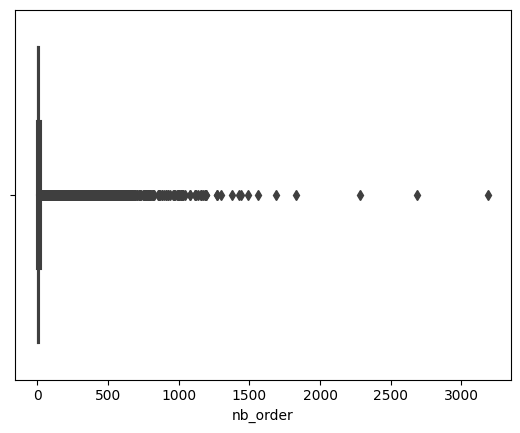

mean_quantity: 


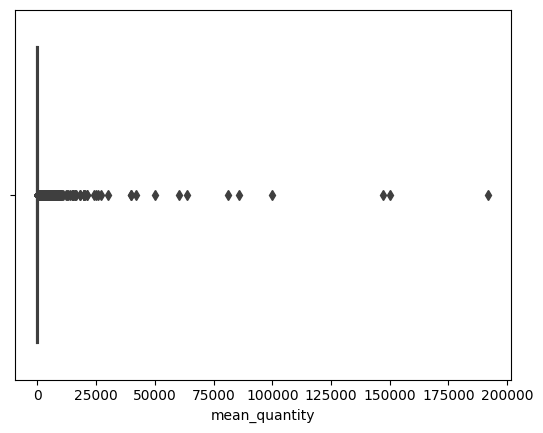

In [39]:
# to see the impact of a log transformation, we can plot the box plot with and without this transformation 
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['nb_order',  'mean_quantity']
#'total', 'diff_prod',
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()

log_nb_order: 


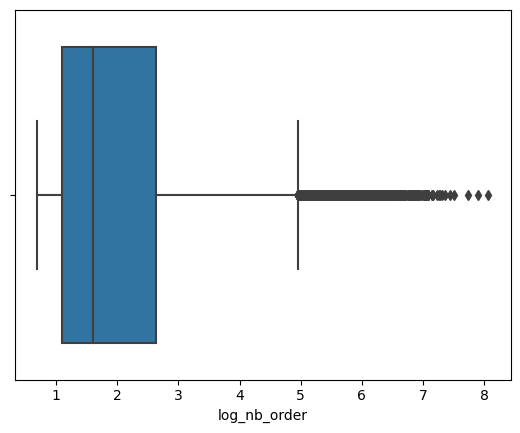

log_mean_quantity: 


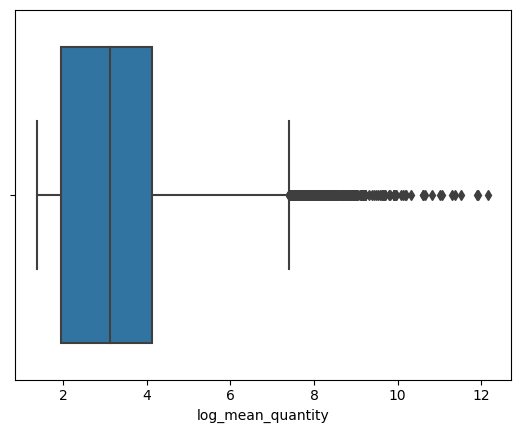

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['log_nb_order', 'log_mean_quantity']
#'log_diff_prod', 
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()

In [41]:
df.columns

Index(['nb_order', 'pos_sales', 'mean_quantity', 'retour', 'diff_prod',
       'log_diff_prod', 'log_nb_order', 'log_pos_sales', 'log_mean_quantity',
       'log_retour'],
      dtype='object')

In [42]:
# final dataset for the clustering

df_log = df[['log_diff_prod', 'log_nb_order', 'log_pos_sales', 'log_mean_quantity',
       'log_retour']]
            #'by phone', 'at the store', 'online']]

In [43]:
df_log

,log_diff_prod,log_nb_order,log_pos_sales,log_mean_quantity,log_retour
0,5.840642,5.996452,11.559464,4.781949,0.000000
1,4.189655,4.290459,9.087537,3.419547,6.476888
2,1.098612,1.098612,6.876669,1.791759,0.000000
3,1.945910,1.945910,7.257718,1.673976,0.000000
4,2.397895,2.484907,6.699348,3.531694,2.356960
...,...,...,...,...,...
111084,2.708050,2.772589,6.822168,4.304065,0.000000
111085,0.693147,0.693147,3.943076,1.791759,0.000000
111086,0.693147,0.693147,1.513367,1.791759,0.000000
111087,0.693147,0.693147,1.558902,1.386294,0.000000


In [44]:
# normalize data

scaler = StandardScaler()
data= scaler.fit_transform(df_log)
df_log = pd.DataFrame(df_log, index=df_log.index, columns=df_log.columns)

In [45]:
df_log

,log_diff_prod,log_nb_order,log_pos_sales,log_mean_quantity,log_retour
0,5.840642,5.996452,11.559464,4.781949,0.000000
1,4.189655,4.290459,9.087537,3.419547,6.476888
2,1.098612,1.098612,6.876669,1.791759,0.000000
3,1.945910,1.945910,7.257718,1.673976,0.000000
4,2.397895,2.484907,6.699348,3.531694,2.356960
...,...,...,...,...,...
111084,2.708050,2.772589,6.822168,4.304065,0.000000
111085,0.693147,0.693147,3.943076,1.791759,0.000000
111086,0.693147,0.693147,1.513367,1.791759,0.000000
111087,0.693147,0.693147,1.558902,1.386294,0.000000


In [156]:
# create initial K-means model
kmeans_model = KMeans(n_clusters = 4,
                      init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [157]:
kmeans_model.fit(df_log)

# print the sum of distances from all examples to the center of the cluster
print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 526015.5982809756


In [158]:
df_log["label"] = kmeans_model.labels_

In [159]:
df_log["label"].value_counts()

2    41850
1    32073
0    21782
3    15384
Name: label, dtype: int64

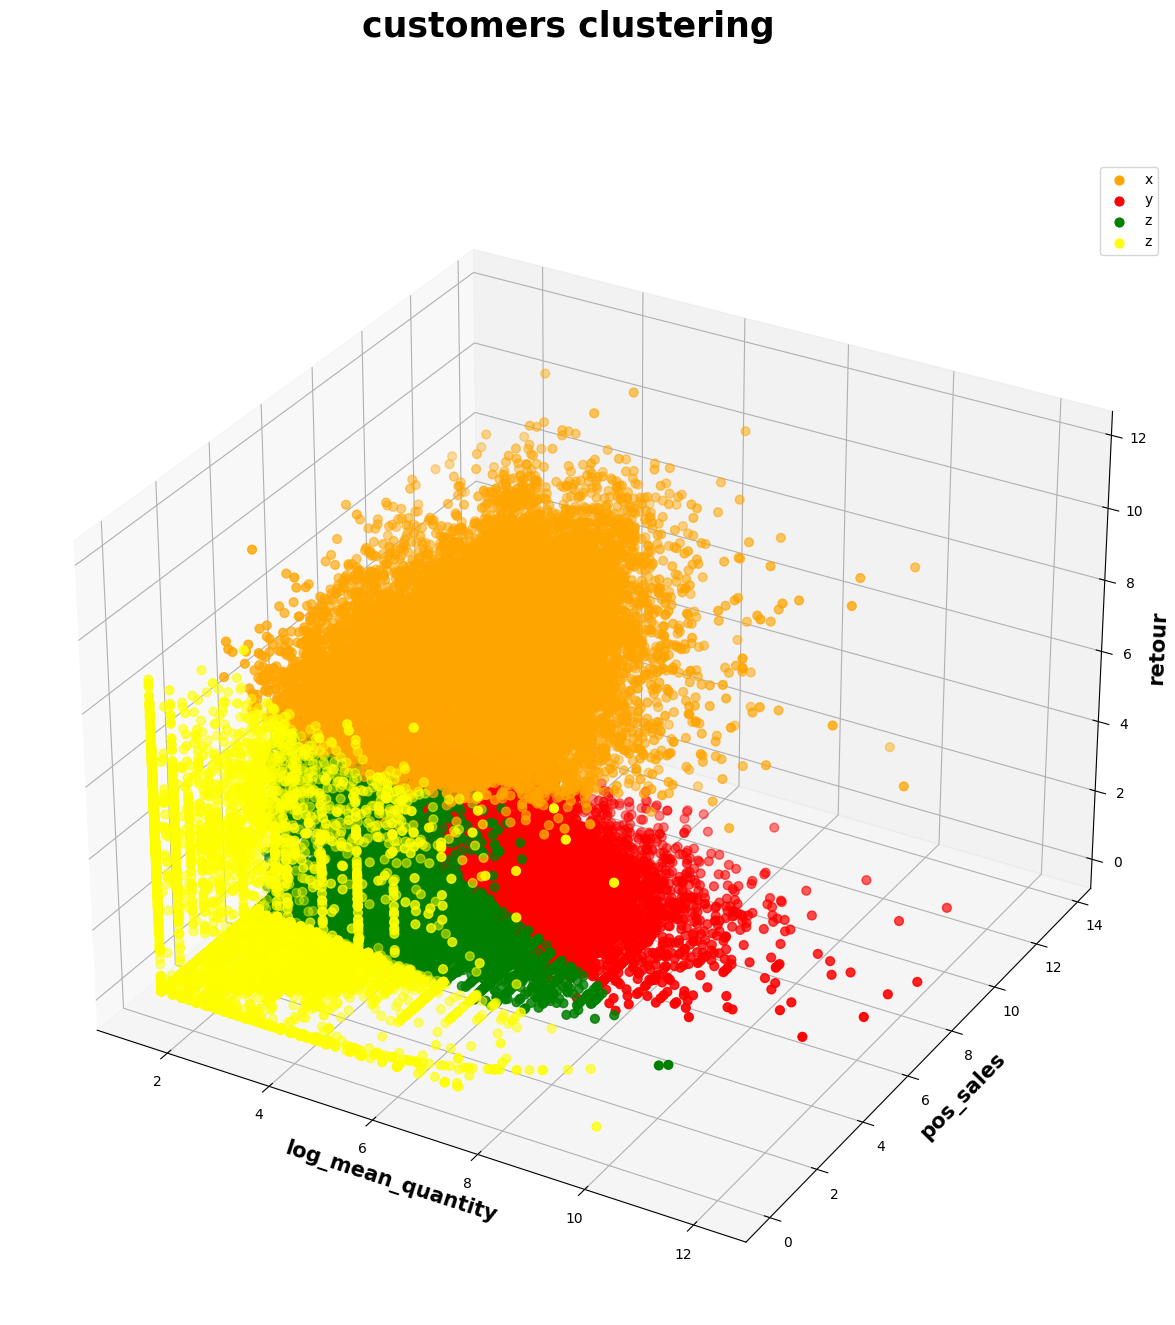

<Figure size 640x480 with 0 Axes>

In [160]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_log.loc[df_log["label"] == 0,'log_mean_quantity'],
           df_log.loc[df_log["label"] == 0,'log_pos_sales'],
          df_log.loc[df_log["label"] == 0,'log_retour']
           , s = 40 , color = 'orange', label = "x")

ax.scatter(df_log.loc[df_log["label"] == 1,'log_mean_quantity'],
           df_log.loc[df_log["label"] == 1,'log_pos_sales'],
          df_log.loc[df_log["label"] == 1,'log_retour']
           , s = 40 , color = 'red', label = "y")
ax.scatter(df_log.loc[df_log["label"] == 2,'log_mean_quantity'],
           df_log.loc[df_log["label"] == 2,'log_pos_sales'],
          df_log.loc[df_log["label"] == 2,'log_retour']
           , s = 40 , color = 'green', label = "z")
ax.scatter(df_log.loc[df_log["label"] == 3,'log_mean_quantity'],
           df_log.loc[df_log["label"] == 3,'log_pos_sales'],
          df_log.loc[df_log["label"] == 3,'log_retour']
           , s = 40 , color = 'yellow', label = "z")

ax.set_xlabel('log_mean_quantity', fontsize=15, fontweight ='bold')
ax.set_ylabel('pos_sales', fontsize=15, fontweight ='bold')
ax.set_zlabel('retour', fontsize=15, fontweight ='bold')
ax.legend()


fig.suptitle('customers clustering', fontsize=25, fontweight ='bold')
plt.show()
plt.savefig("customers_clustering")

In [ ]:
# elbow method to determine the right number of clusters

In [162]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,  
                        max_iter=500, 
                          random_state=42)
    kmeanModel.fit(df_log)
  
    distortions.append(sum(np.min(cdist(df_log, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_log.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_log, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_log.shape[0]
    mapping2[k] = kmeanModel.inertia_

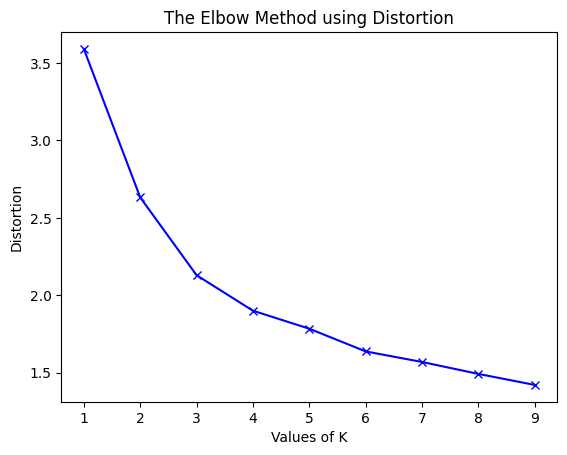

In [163]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# k=4 seems quite appropriate in our case

## Functions

In [8]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../features/')
from clustering_model import *

In [6]:
#load data
df = pd.read_csv(data_path+'sub_df.csv')

In [10]:
pre_df = preprocess_df(df)
pre_df.head()


,client_id,date_order,date_invoice,product_id,sales_net,quantity,order_channel,branch_id,retours,sales
0,14,"[2019-03-21, 2017-11-08, 2017-12-05, 2019-06-1...","[2019-03-21, 2017-11-08, 2017-12-07, 2019-06-1...","[3173964, 2867183, 2896323, 2582447, 3214610, ...","[242.263692, 66.48150000000001, 443.394, 81.17...","[201, 41, 81, 3, 307, 3, 7, 3, 201, 3, 21, 3, ...","[online, by phone, by phone, by phone, online,...","[10319, 10319, 10319, 10319, 10319, 10319, 103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[242.263692, 66.48150000000001, 443.394, 81.17..."
1,18,"[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[2018-10-19, 2018-02-16, 2019-04-10, 2018-10-2...","[598463, 72808, 2357355, 121848, 1199950, 2436...","[103.89100000000002, 26.650866666666666, 16.33...","[5, 13, 5, 9, 23, 9, 3, 5, 3, 3, 11, 3, 5, 401...","[by phone, by phone, by phone, at the store, a...","[6654, 6654, 6654, 6654, 6654, 6654, 6654, 665...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[103.89100000000002, 26.650866666666666, 16.33..."
2,37,"[2017-11-15, 2017-11-14]","[2017-11-15, 2017-11-15]","[641074, 2371108]","[31.487, 936.905]","[5, 5]","[at the store, by phone]","[358, 358]","[0.0, 0.0]","[31.487, 936.905]"
3,40,"[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2018-10-09, 2019-08-21, 2019-08-19, 2018-10-2...","[2200937, 2899606, 96260, 1879223, 3137129, 31...","[905.142, 107.9436, 41.5656, 215.372, 24.4536,...","[3, 3, 9, 5, 3, 3]","[by phone, at the store, at the store, at the ...","[5616, 2235, 2235, 2235, 2235, 2235]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[905.142, 107.9436, 41.5656, 215.372, 24.4536,..."
4,56,"[2018-08-28, 2017-10-26, 2018-10-02, 2018-11-2...","[2018-08-28, 2017-10-26, 2018-10-05, 2018-11-2...","[1489964, 3000784, 2316122, 2778969, 1681540, ...","[118.0084, -8.399600000000001, -1.1592, 188.78...","[101, 11, 3, 3, 3, 5, 201, 21, 3, 3, 11]","[at the store, at the store, at the store, at ...","[5579, 8488, 5579, 5579, 5579, 5579, 5579, 35,...","[0.0, -8.399600000000001, -1.1592, 0.0, 0.0, 0...","[118.0084, -0.0, -0.0, 188.784, 18.63000000000..."


In [11]:
df_new_v = add_variables(pre_df)
df_new_v

,nb_order,pos_sales,mean_quantity,retour,diff_prod
0,401,104762.854958,118.336658,0.0000,343
1,72,8843.378797,29.555556,648.9450,65
2,2,968.392000,5.000000,0.0000,2
3,6,1418.014400,4.333333,0.0000,6
4,11,810.876408,33.181818,9.5588,10
...,...,...,...,...,...
111084,15,916.973425,73.000000,0.0000,14
111085,1,50.577000,5.000000,0.0000,1
111086,1,3.542000,5.000000,0.0000,1
111087,1,3.753600,3.000000,0.0000,1


In [12]:
model_df = model_dataset(df_new_v)
model_df.head()

,log_diff_prod,log_nb_order,log_pos_sales,log_mean_quantity,log_retour
0,5.840642,5.996452,11.559464,4.781949,0.000000
1,4.189655,4.290459,9.087537,3.419547,6.476888
2,1.098612,1.098612,6.876669,1.791759,0.000000
3,1.945910,1.945910,7.257718,1.673976,0.000000
4,2.397895,2.484907,6.699348,3.531694,2.356960


In [13]:
kmeans_model = create_kmeans_model(model_df)
kmeans_model

KMeans(max_iter=500, n_clusters=4, random_state=42)

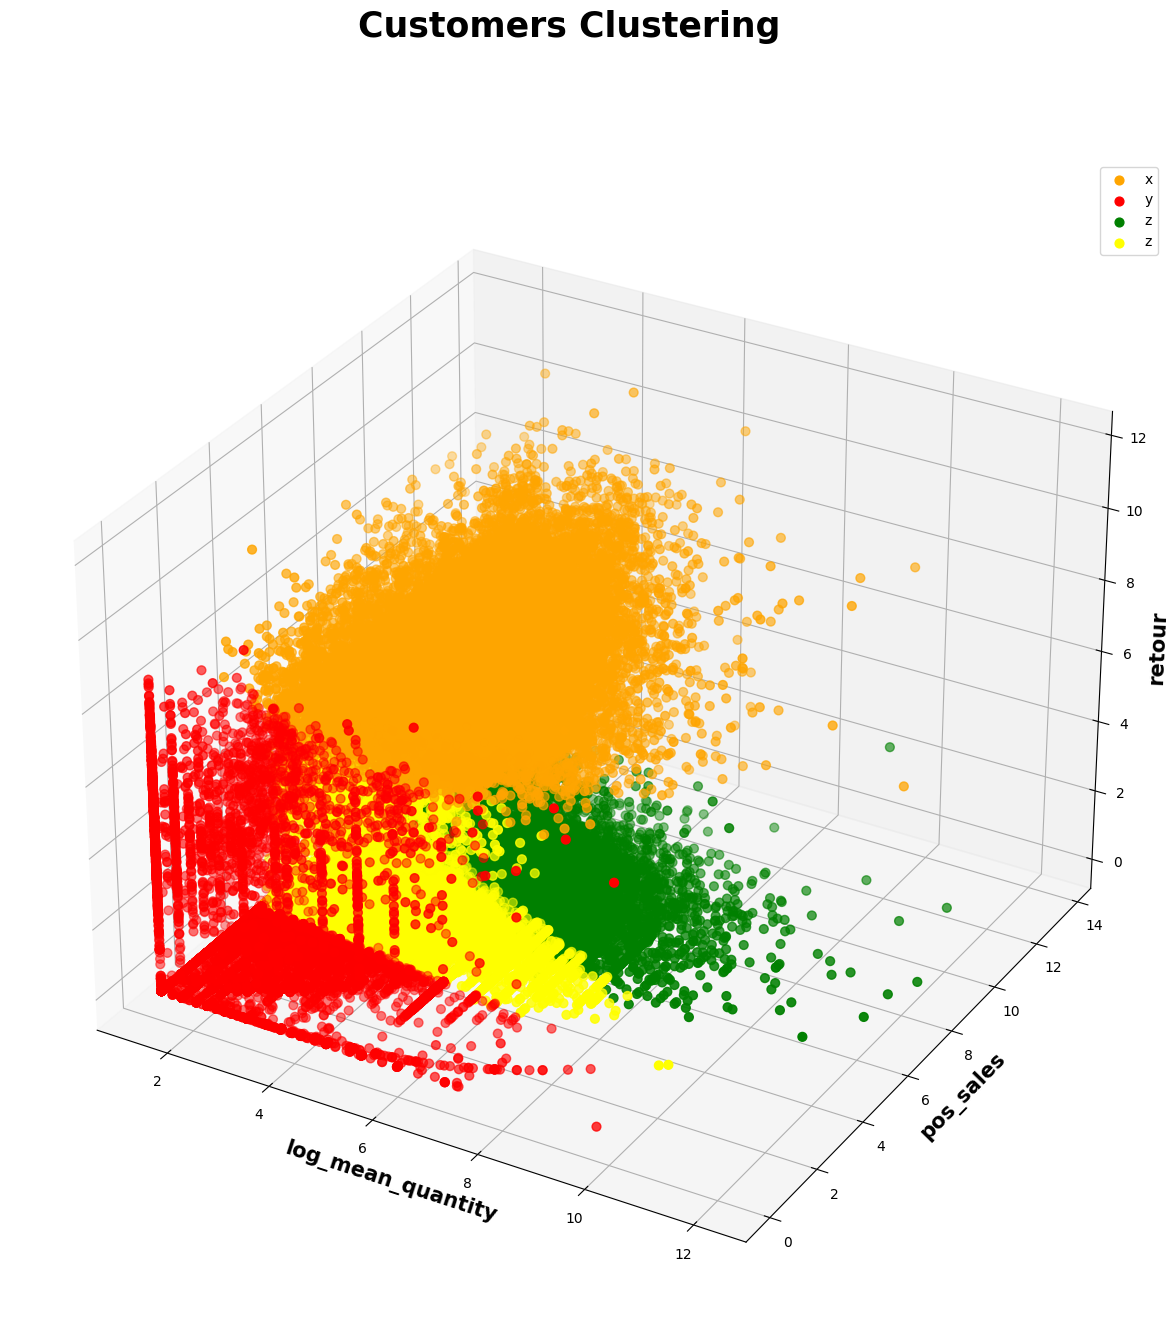

In [14]:
plot_kmeans_clusters(model_df, kmeans_model)

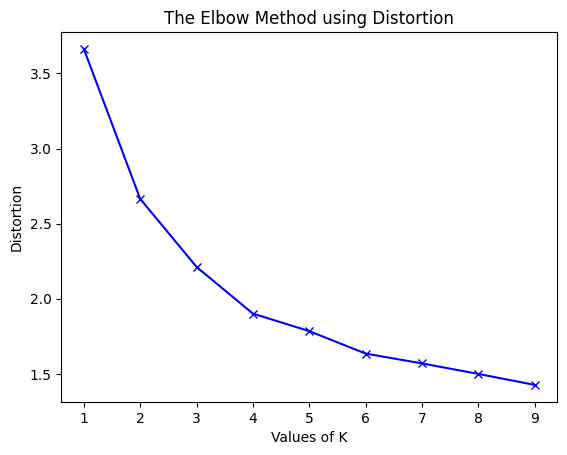

In [15]:
plot_elbow_method(model_df)